# Dataset Inmobiliaria

## Importar Librerías y Cargar Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nicolascp26/Deeplearning/main/PrimerPeriodo/data_inmobiliaria2.csv")
df.head()

,COD_INMUEBLE,NOM_SUCURSAL,NOM_BARRIO,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,FECHA_CONSIGNACION,FECHA_RECONSIGNACION,FECHA_CONTRATO,COD_ESTADO_CONTRATO
0,1,BARRANCABERMEJA,EL PALMAR,BARRANCABERMEJA,CUATRO,APARTAMENTO,23,632600,167400,10092020,NaN,12092020,VIGENTE
1,2,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,TRES,LOCAL,11,500000,0,11042018,NaN,26112020,VIGENTE
2,3,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,TRES,APARTAMENTO,24,500000,0,11042018,NaN,22062019,INACTIVO
3,4,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,TRES,LOCAL,20,515900,0,11042018,NaN,18042018,INACTIVO
4,5,BARRANCABERMEJA,TORCOROMA,BARRANCABERMEJA,TRES,APARTAMENTO,33,729000,271000,22092020,NaN,24102020,VIGENTE


Para los campos que implican fechas, se ha decidido cambiar el formato de ***'00/00/0000'*** a ***00000000***, para no presentar alteraciones futuras en la normalización.

## Analisís de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COD_INMUEBLE          6791 non-null   int64  
 1   NOM_SUCURSAL          6791 non-null   object 
 2   NOM_BARRIO            6791 non-null   object 
 3   NOM_CIUDAD            6791 non-null   object 
 4   ESTRATO               6734 non-null   object 
 5   TIPO_INMUEBLE         6791 non-null   object 
 6   AREA                  6791 non-null   int64  
 7   VLR_CANON             6791 non-null   int64  
 8   VLR_ADMINISTRACION    6791 non-null   int64  
 9   FECHA_CONSIGNACION    6791 non-null   int64  
 10  FECHA_RECONSIGNACION  383 non-null    float64
 11  FECHA_CONTRATO        6791 non-null   int64  
 12  COD_ESTADO_CONTRATO   6791 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 689.8+ KB


In [4]:
  df.isnull().sum()

COD_INMUEBLE               0
NOM_SUCURSAL               0
NOM_BARRIO                 0
NOM_CIUDAD                 0
ESTRATO                   57
TIPO_INMUEBLE              0
AREA                       0
VLR_CANON                  0
VLR_ADMINISTRACION         0
FECHA_CONSIGNACION         0
FECHA_RECONSIGNACION    6408
FECHA_CONTRATO             0
COD_ESTADO_CONTRATO        0
dtype: int64

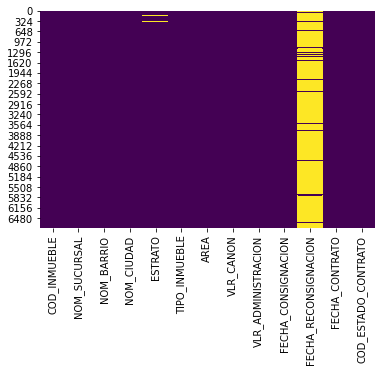

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## Eliminar columna de multiples datos nulos

La columna 'FECHA_RECONSIGNACION' presenta evidentemente, un porcentaje de valores nulos de más del 50%, por lo que para evitar sesgos en la información, se decide eliminar toda la columna. 

In [6]:
df.drop(labels=['FECHA_RECONSIGNACION'], inplace=True, axis=1)

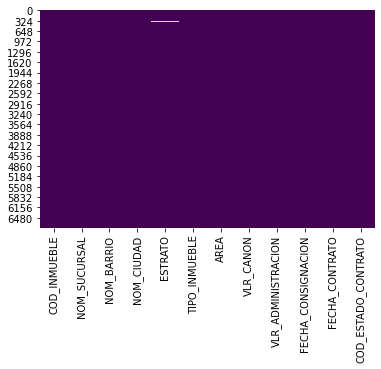

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## Normalizar - Imputar Datos

In [8]:
df.isnull().sum()

COD_INMUEBLE            0
NOM_SUCURSAL            0
NOM_BARRIO              0
NOM_CIUDAD              0
ESTRATO                57
TIPO_INMUEBLE           0
AREA                    0
VLR_CANON               0
VLR_ADMINISTRACION      0
FECHA_CONSIGNACION      0
FECHA_CONTRATO          0
COD_ESTADO_CONTRATO     0
dtype: int64

Para normalizar los datos, se hizo elección de hacerlo por medio de un diccionario, ya que si se aplica con la función de LabelEnconder() de sklearn, nos genera conflictos en el orden de los valores e inserción de los datos nulos.  

In [9]:
estrato = {'UNO':1, 'DOS':2, 'TRES':3, 'CUATRO':4, 'CINCO':5, 'SEIS':6, 'COMERCIAL':7, 'SIN ASIGNAR':0}
df['ESTRATO'] = df['ESTRATO'].map(estrato)

df.head()

,COD_INMUEBLE,NOM_SUCURSAL,NOM_BARRIO,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,FECHA_CONSIGNACION,FECHA_CONTRATO,COD_ESTADO_CONTRATO
0,1,BARRANCABERMEJA,EL PALMAR,BARRANCABERMEJA,4.0,APARTAMENTO,23,632600,167400,10092020,12092020,VIGENTE
1,2,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,3.0,LOCAL,11,500000,0,11042018,26112020,VIGENTE
2,3,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,3.0,APARTAMENTO,24,500000,0,11042018,22062019,INACTIVO
3,4,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,3.0,LOCAL,20,515900,0,11042018,18042018,INACTIVO
4,5,BARRANCABERMEJA,TORCOROMA,BARRANCABERMEJA,3.0,APARTAMENTO,33,729000,271000,22092020,24102020,VIGENTE


Al observar que las demás columnas no presentan datos que generen conflicto, se procede a normalizarlos de manera automática.

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [11]:
captura_caracteristicas = [x for x in df.columns if df[x].dtype=='object']

In [12]:
for col in captura_caracteristicas:
  if col in df.columns:
    i = df.columns.get_loc(col)
    df.iloc[: , i] = df.apply(lambda i:label_encoder.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COD_INMUEBLE         6791 non-null   int64  
 1   NOM_SUCURSAL         6791 non-null   int64  
 2   NOM_BARRIO           6791 non-null   int64  
 3   NOM_CIUDAD           6791 non-null   int64  
 4   ESTRATO              6734 non-null   float64
 5   TIPO_INMUEBLE        6791 non-null   int64  
 6   AREA                 6791 non-null   int64  
 7   VLR_CANON            6791 non-null   int64  
 8   VLR_ADMINISTRACION   6791 non-null   int64  
 9   FECHA_CONSIGNACION   6791 non-null   int64  
 10  FECHA_CONTRATO       6791 non-null   int64  
 11  COD_ESTADO_CONTRATO  6791 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 636.8 KB


La columna ESTRATO es de tipo float64, porque hay datos nulos involucrados.

In [14]:
df.isnull().sum()

COD_INMUEBLE            0
NOM_SUCURSAL            0
NOM_BARRIO              0
NOM_CIUDAD              0
ESTRATO                57
TIPO_INMUEBLE           0
AREA                    0
VLR_CANON               0
VLR_ADMINISTRACION      0
FECHA_CONSIGNACION      0
FECHA_CONTRATO          0
COD_ESTADO_CONTRATO     0
dtype: int64

In [15]:
df.head()

,COD_INMUEBLE,NOM_SUCURSAL,NOM_BARRIO,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,FECHA_CONSIGNACION,FECHA_CONTRATO,COD_ESTADO_CONTRATO
0,1,0,81,0,4.0,0,23,632600,167400,10092020,12092020,2
1,2,0,62,0,3.0,2,11,500000,0,11042018,26112020,2
2,3,0,62,0,3.0,0,24,500000,0,11042018,22062019,0
3,4,0,62,0,3.0,2,20,515900,0,11042018,18042018,0
4,5,0,237,0,3.0,0,33,729000,271000,22092020,24102020,2


In [16]:
def inp_estrato(cols):
   estrato = cols[0] 
   inmueble = cols[1]

   if pd.isnull(estrato):
       if inmueble == 0:
           return df[df['TIPO_INMUEBLE']==0]['ESTRATO'].mean()
       elif inmueble == 1:
           return df[df['TIPO_INMUEBLE']==1]['ESTRATO'].mean()
       elif inmueble == 2:
           return df[df['TIPO_INMUEBLE']==2]['ESTRATO'].mean()
   else:
        return estrato

In [17]:
df['ESTRATO']= df[['ESTRATO', 'TIPO_INMUEBLE']].apply(inp_estrato, axis=1)

In [18]:
df['ESTRATO'] = df['ESTRATO'].astype('int')

In [19]:
df.isnull().sum()

COD_INMUEBLE           0
NOM_SUCURSAL           0
NOM_BARRIO             0
NOM_CIUDAD             0
ESTRATO                0
TIPO_INMUEBLE          0
AREA                   0
VLR_CANON              0
VLR_ADMINISTRACION     0
FECHA_CONSIGNACION     0
FECHA_CONTRATO         0
COD_ESTADO_CONTRATO    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   COD_INMUEBLE         6791 non-null   int64
 1   NOM_SUCURSAL         6791 non-null   int64
 2   NOM_BARRIO           6791 non-null   int64
 3   NOM_CIUDAD           6791 non-null   int64
 4   ESTRATO              6791 non-null   int64
 5   TIPO_INMUEBLE        6791 non-null   int64
 6   AREA                 6791 non-null   int64
 7   VLR_CANON            6791 non-null   int64
 8   VLR_ADMINISTRACION   6791 non-null   int64
 9   FECHA_CONSIGNACION   6791 non-null   int64
 10  FECHA_CONTRATO       6791 non-null   int64
 11  COD_ESTADO_CONTRATO  6791 non-null   int64
dtypes: int64(12)
memory usage: 636.8 KB


## Gráfica de los datos

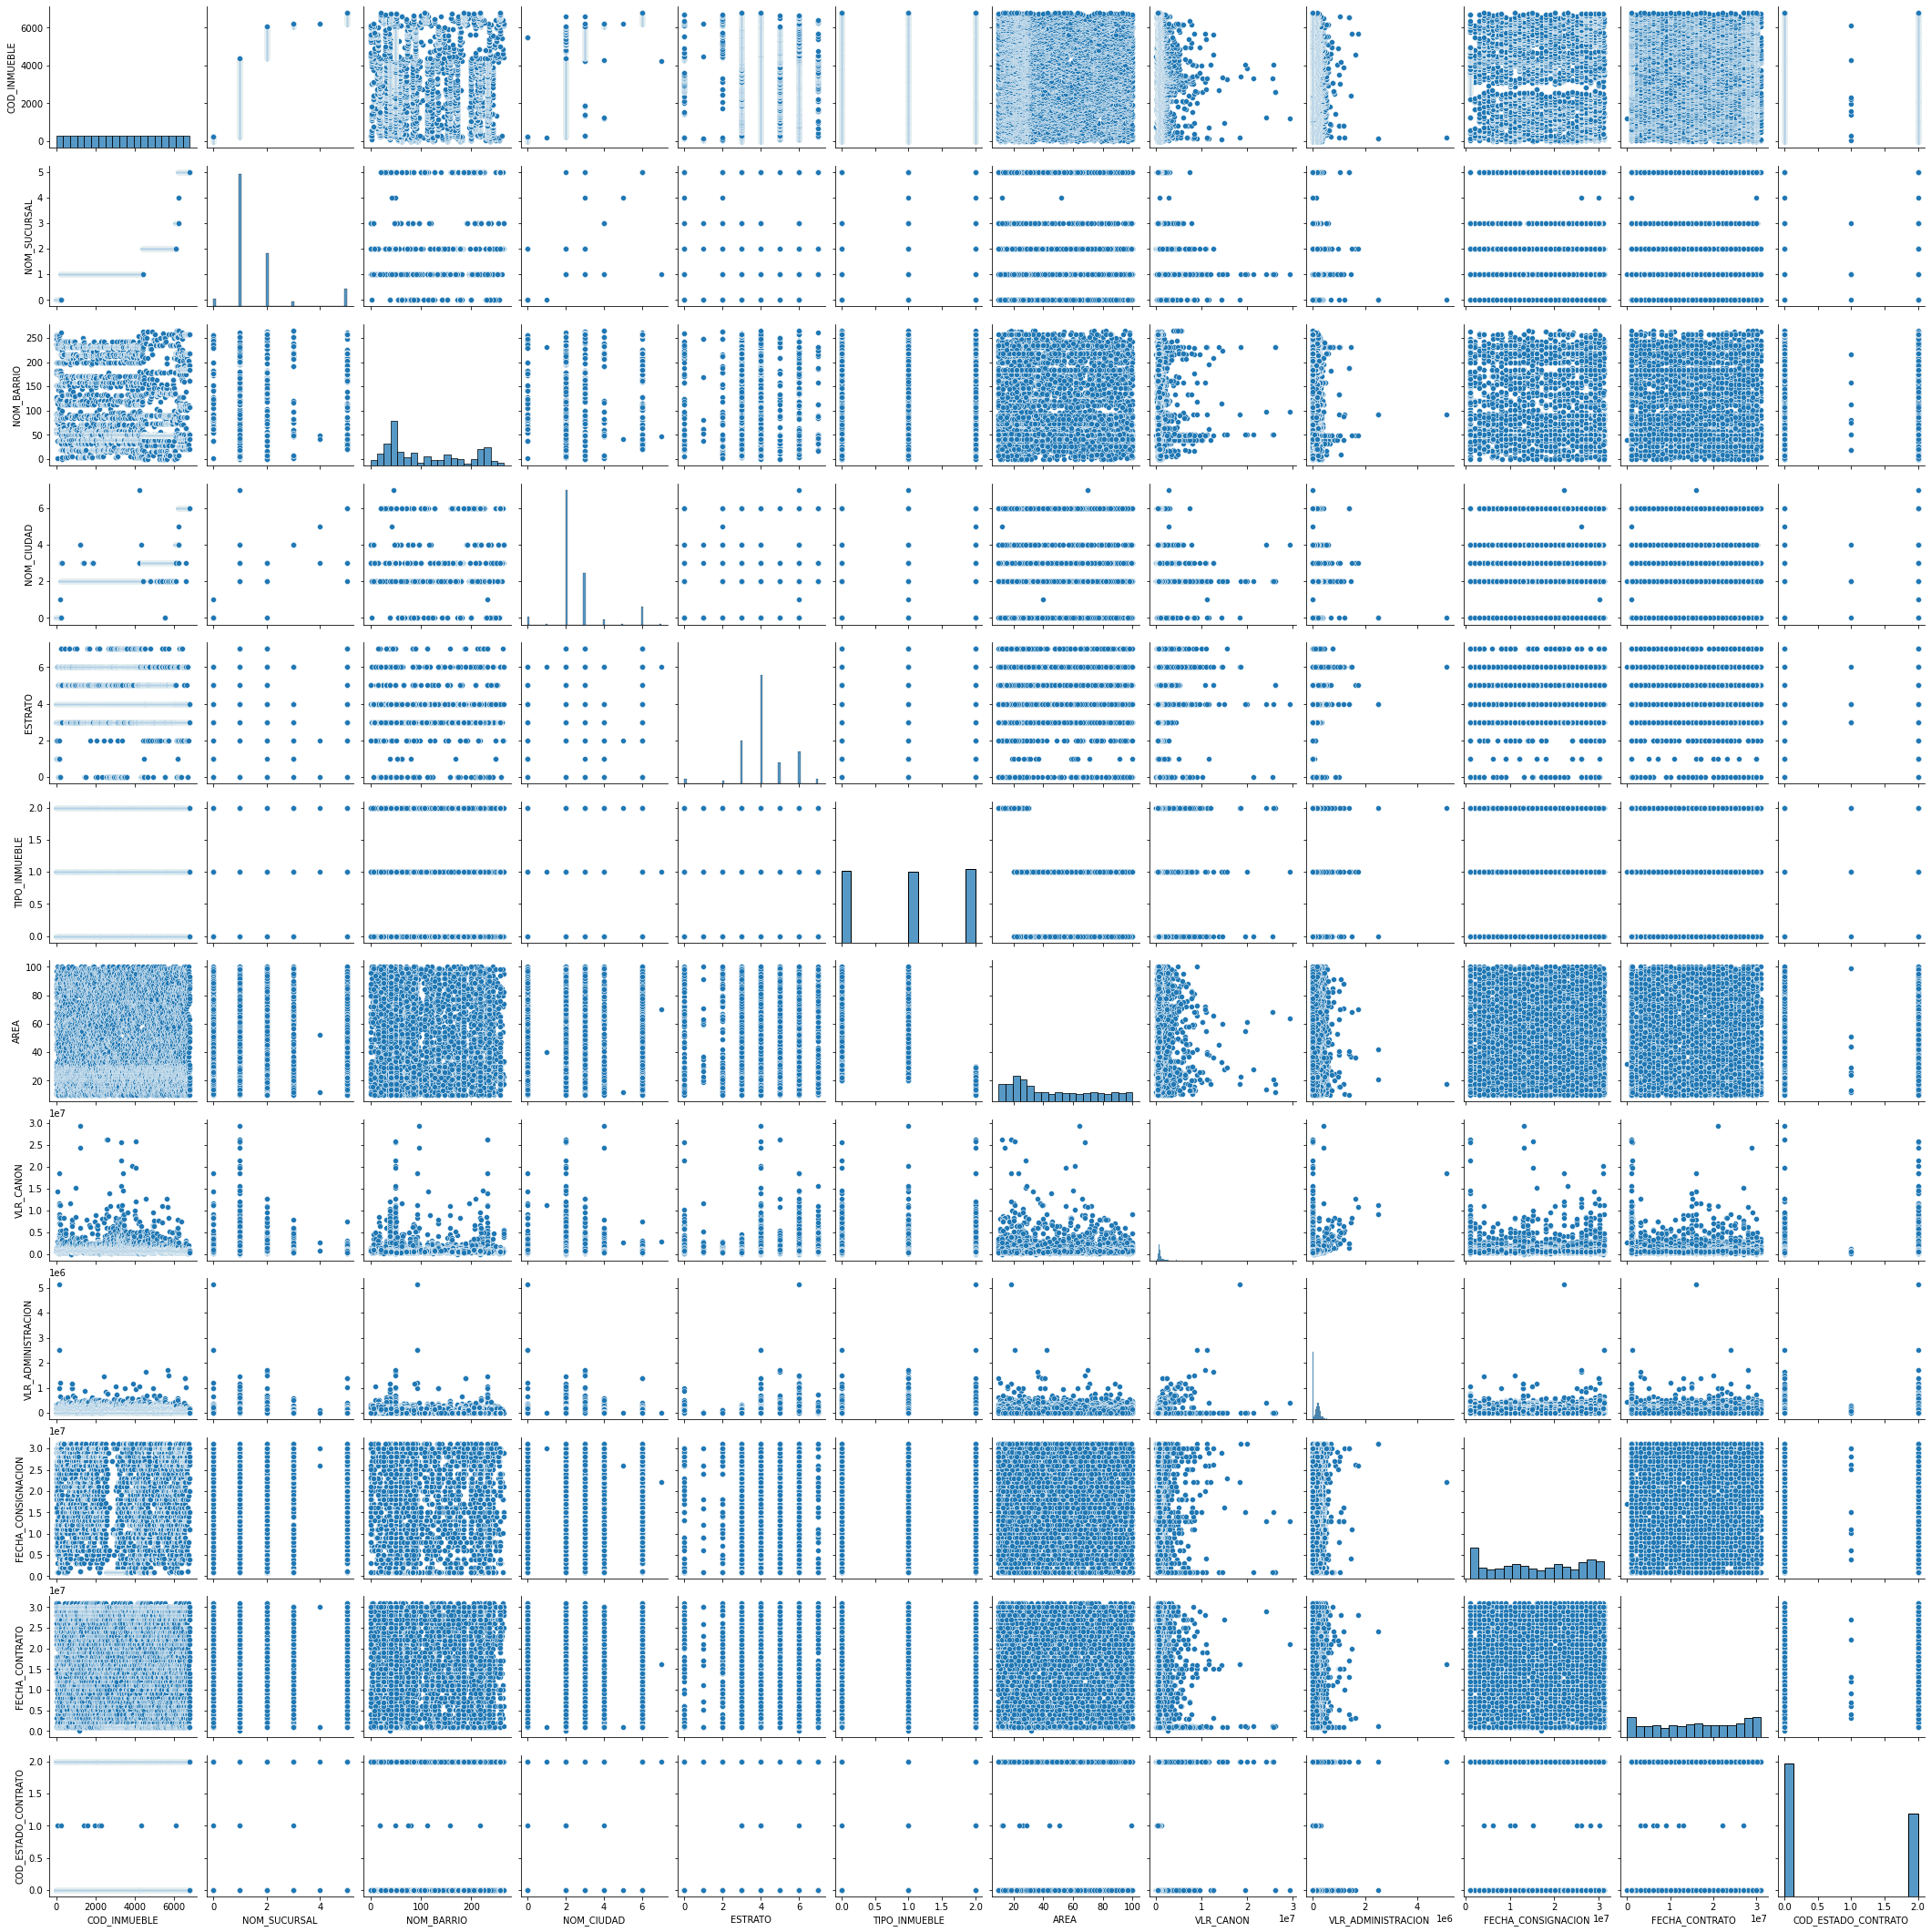

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

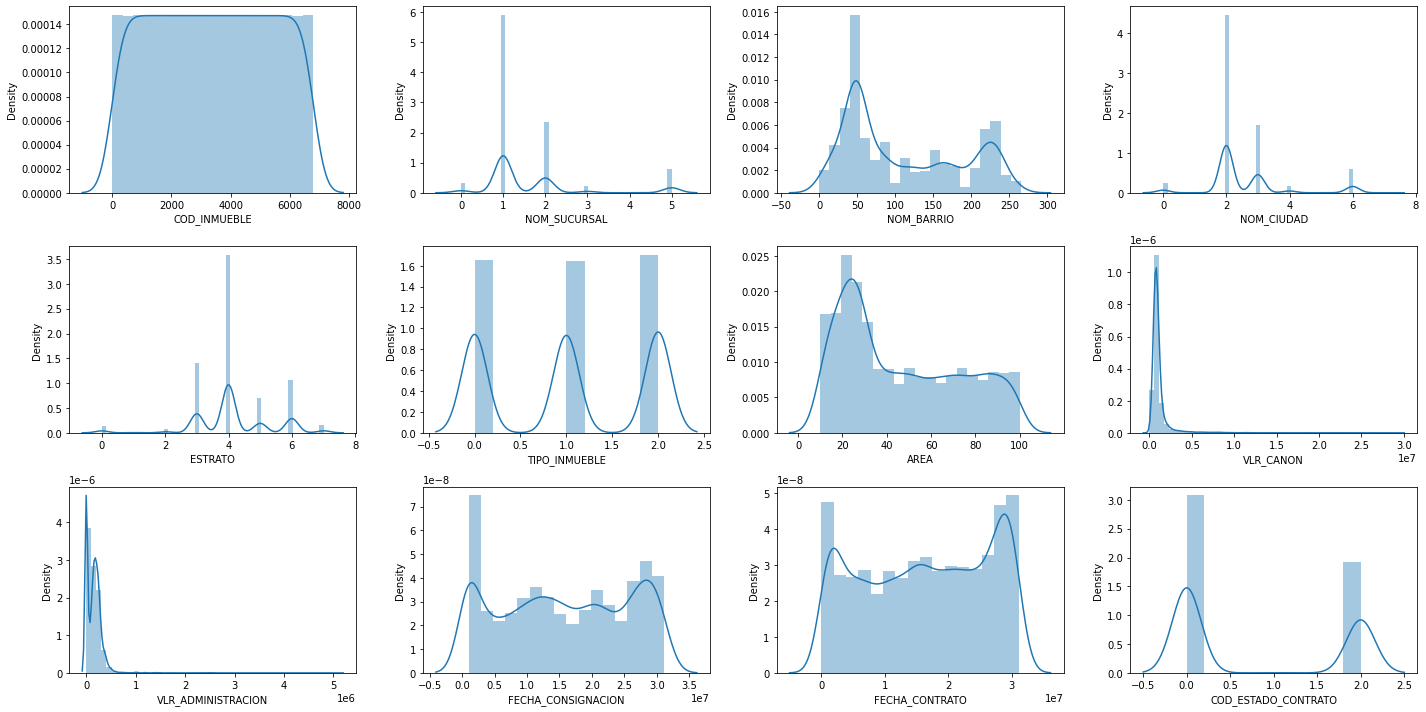

In [ ]:
rows = 3
cols = 4

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))

col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax=ax[i][j])
        index += 1

plt.tight_layout()

## Separar la data

In [21]:
from sklearn.model_selection import train_test_split

In [44]:
y = df['COD_ESTADO_CONTRATO']
X = df.drop(columns=['COD_ESTADO_CONTRATO', 'COD_INMUEBLE', 'FECHA_CONSIGNACION', 'FECHA_CONTRATO', 'VLR_ADMINISTRACION'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Aplicación del modelo de Árbol de Decisión Clasificación: 63.25%

Este modelo es uno de los más óptimos, aunque su nivel de inferencia es bajo en comparación de lo requerido.

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   COD_INMUEBLE         6791 non-null   int64
 1   NOM_SUCURSAL         6791 non-null   int64
 2   NOM_BARRIO           6791 non-null   int64
 3   NOM_CIUDAD           6791 non-null   int64
 4   ESTRATO              6791 non-null   int64
 5   TIPO_INMUEBLE        6791 non-null   int64
 6   AREA                 6791 non-null   int64
 7   VLR_CANON            6791 non-null   int64
 8   VLR_ADMINISTRACION   6791 non-null   int64
 9   FECHA_CONSIGNACION   6791 non-null   int64
 10  FECHA_CONTRATO       6791 non-null   int64
 11  COD_ESTADO_CONTRATO  6791 non-null   int64
dtypes: int64(12)
memory usage: 636.8 KB


In [45]:
max_depth_lista = list(range(1, 30))

accuracy = []

for depth in max_depth_lista:
  arbol_clas = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol_clas.fit(X_train, y_train)
  score = arbol_clas.score(X_test, y_test)
  accuracy.append(score)

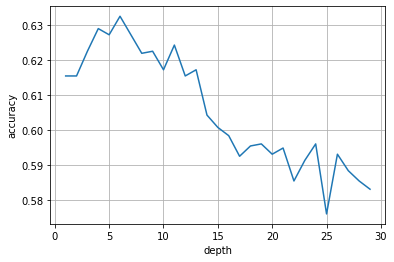

In [46]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [47]:
arbol_clas = DecisionTreeClassifier(max_depth=6, random_state=0)

In [48]:
arbol_clas.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [49]:
accuracy = arbol_clas.score(X_test, y_test)
print(accuracy*100)

63.25088339222616


## Aplicación del modelo de Árbol de Decisión Clasificación con tamaño de test MAS PEQUEÑO: 64.01%

Se borrarn las columnas en X, porque: 
- Las fechas alteran el modelo
- Los Codigos porque son solo indicadores de los registros
- Valor de la administración, porque los valores que sesgaban el modelo, al estar en 0

In [82]:
y = df['COD_ESTADO_CONTRATO']
X = df.drop(columns=['COD_ESTADO_CONTRATO', 'COD_INMUEBLE', 'FECHA_CONSIGNACION', 'FECHA_CONTRATO', 'VLR_ADMINISTRACION'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [83]:
max_depth_lista = list(range(1, 30))

accuracy = []

for depth in max_depth_lista:
  arbol_clas = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol_clas.fit(X_train, y_train)
  score = arbol_clas.score(X_test, y_test)
  accuracy.append(score)

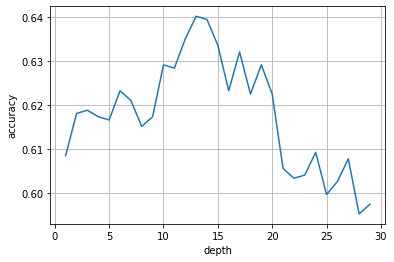

In [84]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [76]:
arbol_clas = DecisionTreeClassifier(max_depth=13, random_state=0)

In [77]:
arbol_clas.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [78]:
accuracy = arbol_clas.score(X_test, y_test)
print(accuracy*100)

64.01766004415012


## Dejando solo 2 estados para la columna de COD_ESTADO_CONTRATO

In [86]:
cod_estado = {0:0, 1:df['COD_ESTADO_CONTRATO'].mode(), 2:1}

df['COD_ESTADO_CONTRATO'] = df['COD_ESTADO_CONTRATO'].map(cod_estado)

In [90]:
df['COD_ESTADO_CONTRATO'] = df['COD_ESTADO_CONTRATO'].astype('int')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   COD_INMUEBLE         6791 non-null   int64
 1   NOM_SUCURSAL         6791 non-null   int64
 2   NOM_BARRIO           6791 non-null   int64
 3   NOM_CIUDAD           6791 non-null   int64
 4   ESTRATO              6791 non-null   int64
 5   TIPO_INMUEBLE        6791 non-null   int64
 6   AREA                 6791 non-null   int64
 7   VLR_CANON            6791 non-null   int64
 8   VLR_ADMINISTRACION   6791 non-null   int64
 9   FECHA_CONSIGNACION   6791 non-null   int64
 10  FECHA_CONTRATO       6791 non-null   int64
 11  COD_ESTADO_CONTRATO  6791 non-null   int64
dtypes: int64(12)
memory usage: 636.8 KB


## Aplicación del modelo de Árbol de Decisión Clasificación con tamaño de test MAS PEQUEÑO: 64.45%

Se borrarn las columnas en X, porque: 
- Las fechas alteran el modelo
- Los Codigos porque son solo indicadores de los registros
- Valor de la administración, porque los valores que sesgaban el modelo, al estar en 0

In [93]:
y = df['COD_ESTADO_CONTRATO']
X = df.drop(columns=['COD_ESTADO_CONTRATO', 'COD_INMUEBLE', 'FECHA_CONSIGNACION', 'FECHA_CONTRATO', 'VLR_ADMINISTRACION'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [94]:
max_depth_lista = list(range(1, 30))

accuracy = []

for depth in max_depth_lista:
  arbol_clas = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol_clas.fit(X_train, y_train)
  score = arbol_clas.score(X_test, y_test)
  accuracy.append(score)

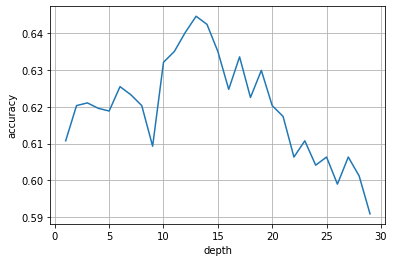

In [95]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [96]:
arbol_clas = DecisionTreeClassifier(max_depth=13, random_state=0)

In [97]:
arbol_clas.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [98]:
accuracy = arbol_clas.score(X_test, y_test)
print(accuracy*100)

64.45916114790286


## Modelo de Regresión Logistica: 60.04%

In [102]:
from sklearn.linear_model import LogisticRegression

regresion_logistica = LogisticRegression()
regresion_logistica.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
from sklearn import metrics 

In [109]:
y_prediction = regresion_logistica.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 60.04415011037527%
